In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Traveling Salesman Problem
The Travelling Salsesman Problem (TSP) is stated as follows: 
"Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?". [1](https://en.wikipedia.org/wiki/Travelling_salesman_problem).
This is an **optimization** (minimization) problem, where the objective function is the total length of the route.

## Definitions
The cities are defined with their x and y coordinates.

$$
X = \left[\begin{array}{cc} x_{1} & y_{1}\\ x_{2} & y_{2}\\ \vdots & \vdots\\ x_{n} & y_{n} \end{array}\right]
$$

where $n$ is the number of cities.
The matrix of distances $A$ is a matrix where each element represent the distance between the i-th and j-th cities.

$$
A = \left[\begin{array}{cccc}
0 & a_{12} & \dots & a_{1n}\\
a_{21} & 0 & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \dots & 0
\end{array}\right]
$$

where $a_{ij}=a_{ji}=||x_{i}-x_{j}||$. Two properties of this matrix are:
- it is a square matrix;
- it is symmetric;
- the element on the diagonal are zeros.

## Simulation
Random cities are initialized. For reproducibility, the seed of the random number generator is set to a certain value.

Text(0.5, 1.0, '25 random cities')

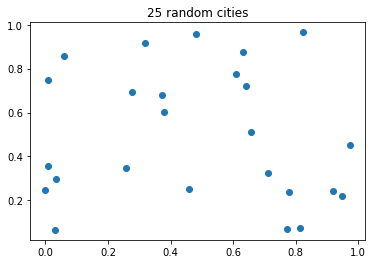

In [9]:
np.random.seed(13)
n = 25
x = np.random.rand(n, 2)
plt.scatter(x[:,0], x[:,1])
plt.title(str(n) + ' random cities')

Then the matrix of distances $A$ is defined. The information of the starting and ending cities is given in the data dictionary, with the keyword *depot*.

In [10]:
# matrix of distances
A = np.zeros((n, n))

for i in range(n):
    for j in range(i):
        A[i, j] = np.linalg.norm(x[i]-x[j])
        A[j, i] = A[i, j]

data = {
    'distance_matrix': A,
    'depot': 0,
}

Then, a function to compute the length of the route is defined.

In [11]:
def computeDistance(route, data):
    """
    Compute the total length of the route. 
    The order into which cities are visited is defined into the route array;
    each element represent a city.
    Then, the total distance is computed with the matrix of distances.
    """
    
    depot = data['depot']
    distanceMatrix = data['distance_matrix']
    totalDistance = 0
    x = np.int64(route)
    x = np.insert(route, [0, n-1], data['depot'])
    for i in range(np.shape(route)[0]-1):
        totalDistance += distanceMatrix[route[i], route[i+1]]
    return totalDistance

## Optimization
The TSP is a NP-hard combinatory problem; a robust solver is therefore needed. In this case, the **simulated annealing algorithm** [2](https://en.wikipedia.org/wiki/Simulated_annealing) has been used. This works as follows:
1. Start with an initial random solution, which has a value $f(x_0)$ of the objective function. By now, this is the best solution $x_0 = x_{best}$.
1. Select a local neighbor $x_{new}$ of this solution and compute $f(x_{new})$. The local neighbor is created with an inversion of a sub-route of $x_0$.
1. If $\Delta E = f(x_{new}) - f(x_{best})\le 0$, then the new solution is accepted: $x_{best} = x_{new}$.
1. If $\Delta E > 0$, the solution could still be accepted. This happens with a probability $P(\Delta E) = e^{-\frac{\Delta E}{kT}}$. The temperature $T$ is a fundamental variable of the algorithm. As the number of iterations grows, the temperature decrease (with a geometric progression: $T(i)=T(i-1)\cdot c_r$, where $c_r$ is the cooling ratio). So, the greater the iteration number, the less probability there is to accept a solution which does not optimize the objective function.
1. Repeat steps 2-4 until convergence.

In [26]:
def SimulatedAnnealing(fun, x0, args=(), max_iter=25000, tol=1e-9, T0=2000, cr=0.995):
    best_x = x0
    T = T0
    for i in range(max_iter): 
        # new candidate solution
        new_x = best_x.copy()

        id1 = np.random.randint(best_x.shape[0])
        id2 = np.random.randint(best_x.shape[0])
        new_x[id1:id2] = new_x[id1:id2][::-1]
        
        delta_E = fun(new_x, args) - fun(best_x, args)
        
        # Metropolis
        if delta_E <= 0:
            best_x = new_x
        else:
            probability = np.exp(-delta_E/T)
            if probability > np.random.rand():
                best_x = new_x
                if delta_E <= tol:
                    pass
            T *= cr
    print(fun(best_x, args))
    return best_x

In [27]:
a=SimulatedAnnealing(computeDistance, np.arange(1,n), args=data)

4.055946886358072


Text(0.5, 1.0, 'Best route')

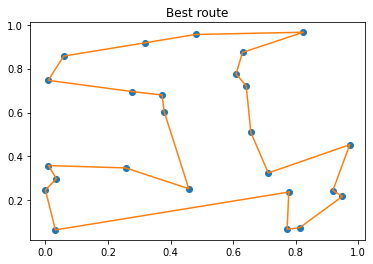

In [28]:
a = np.insert(a, [0, n-1], data['depot'])
plt.plot(x[:,0], x[:,1], 'o')
routes = x[a]
plt.plot(routes[:,0], routes[:,1])
plt.title('Best route')

## MATLAB implementation
The same algorithm has been implemented in MATLAB, which makes it easier to monitor the convergence of the solution.
Here it is reported the monitoring panel developed in MATLAB.

![SegmentLocal](TSP.gif "segment")